In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline        
# for inline display of graphs

In [2]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()

In [3]:
diabetes.keys()           

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
diabetes.frame

## Preparing the data

In [6]:
df=pd.DataFrame(diabetes.data,columns=[diabetes.feature_names])

In [7]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [8]:
df['dis_prog']=diabetes.target

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   (age,)       442 non-null    float64
 1   (sex,)       442 non-null    float64
 2   (bmi,)       442 non-null    float64
 3   (bp,)        442 non-null    float64
 4   (s1,)        442 non-null    float64
 5   (s2,)        442 non-null    float64
 6   (s3,)        442 non-null    float64
 7   (s4,)        442 non-null    float64
 8   (s5,)        442 non-null    float64
 9   (s6,)        442 non-null    float64
 10  (dis_prog,)  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [10]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,dis_prog
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [11]:
df.isnull()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,dis_prog
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
437,False,False,False,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False,False,False,False
439,False,False,False,False,False,False,False,False,False,False,False
440,False,False,False,False,False,False,False,False,False,False,False


# EDA

In [12]:
# incase of regression problem statment first thing you need to find is correlation
# cuz we need to see how a independent variable are related to another independent variable and target variable
# is an indpndnt feature is highly(+vely or -vely) correlated with  another ind.. then we can remove one of the feature this is called linear colinearity

df.corr()          #it gives preason correlation ranges from +1 to -1


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,dis_prog
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


Text(0, 0.5, 'bp')

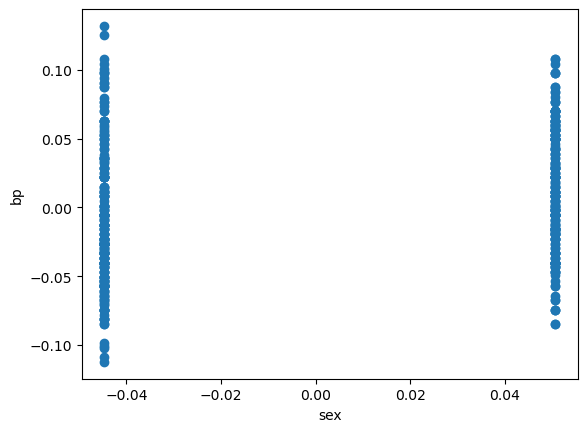

In [13]:
plt.scatter(df['sex'],df['bp'])          #this plot is not  coming as we want cuz te dataser is mean centred
plt.xlabel("sex")            
plt.ylabel('bp')

<AxesSubplot:xlabel="('bp',)", ylabel="('dis_prog',)">

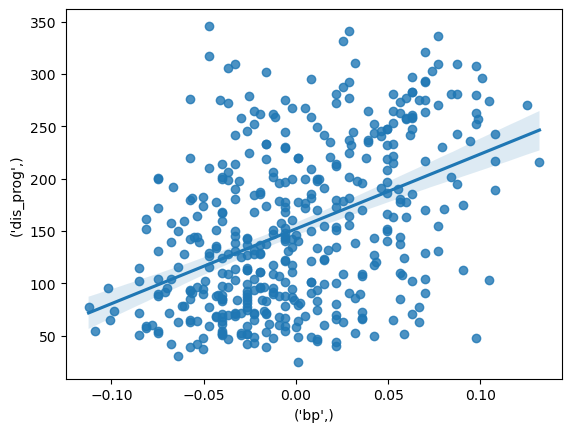

In [14]:
sns.regplot(x='bp',y='dis_prog',data=df)

## Lets Build a model

In [15]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3, random_state=42)       #30% data for test

In [16]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [17]:
regression.fit(X_train.to_numpy(),Y_train.to_numpy())     #we converted data frame to numpy array ,if data frame had directly given then also code will run but some warning will come

LinearRegression()

In [18]:
##print coeffitients
print(regression.coef_)      # w0, w1, w2 ....

[  29.25034582 -261.70768053  546.29737263  388.40077257 -901.95338706
  506.761149    121.14845948  288.02932495  659.27133846   41.37536901]


In [19]:
print(regression.intercept_)      #b

151.00818273080338


In [20]:
###prediction with test data
reg_pred=regression.predict(X_test.to_numpy())

In [21]:
reg_pred

array([138.47032272, 181.10311796, 125.34650402, 292.75409394,
       123.88080069,  91.89920521, 257.26623571, 177.76309357,
        84.98399508, 109.15734248,  94.4860807 , 166.13170425,
        57.40863723, 206.13846128,  97.78386268, 131.0064874 ,
       214.29968996, 252.53124994, 199.6645535 , 219.49967665,
       203.2365464 ,  88.00667238,  70.65206201, 186.92065774,
       155.81290675, 162.80795787, 191.93403891, 184.72672694,
        46.62855775, 108.26601337, 178.14954273,  91.35193917,
       127.72256442, 184.04456013, 172.23860522, 189.51563882,
       121.83424016, 117.75704799, 145.68144979,  58.57463632,
        72.55651144, 107.28029907, 166.15444516, 153.2915978 ,
       165.18988007,  62.95728971,  73.59139539, 110.05312255,
        54.49528123, 164.89115961, 152.49647694,  63.8896717 ,
       111.43581765, 108.34693634, 179.9672652 , 158.69983432,
        95.04606308, 209.69032262, 118.37314403,  69.69981244,
       189.04947787, 204.99342248, 140.26696914, 105.75

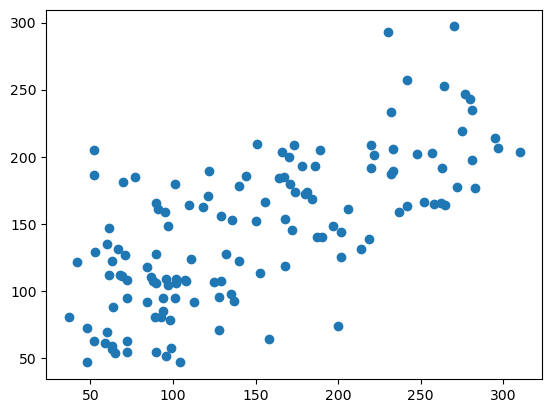

In [22]:
plt.scatter(Y_test,reg_pred)

In [23]:
# residual / errors
residual=reg_pred -Y_test
residual

287    -80.529677
211    111.103118
72     -76.653496
321     62.754094
73      12.880801
          ...    
238    -54.004004
26     -44.899563
7       59.288357
401    -12.192656
108      1.220672
Name: (dis_prog,), Length: 133, dtype: float64

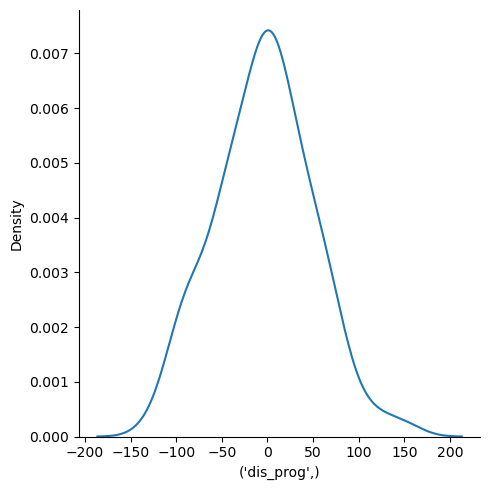

In [24]:
sns.displot(residual, kind='kde')            #this urve should be normally distriuted about 0 and should have as much less spread as possible

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(mean_absolute_error(Y_test,reg_pred))
print(mean_squared_error(Y_test,reg_pred))
print(r2_score(Y_test,reg_pred))
print()

41.919253605566794
2821.7385595843766
0.47729201741573324


## Pickling The Model For Deployment
generally pickling is used for storing object in permanant storage for later use,here we have regression model which we want to pickle cuz again and again traing the model id not a good idea.
also by pickling we can deploy our model at other places as well

In [30]:
import pickle

In [31]:
pickle.dump(regression ,open('myPickledRegModel.pkl','wb'))  #wb: write byte , give extension pkl
#pickle serializes the object and then store in the file